

L’ensemble de données: Température quotidienne moyenne de différentes villes du monde de 1995 à 2020

#### Ordre du jour :
    Tâche 1 : Importation de notre jeu de données 
    Tâche 2 : Prétraitement des données
    Tâche 3 : Analyse de la température mondiale de 1995 à 2020
    Tâche 4 : Comparaison de la température moyenne annuelle de différentes régions au fil du temps
    Tâche 5 : Température moyenne mensuelle au Canada



Ce champ est pour importer les modules nécessaires 


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

**Chargez le jeux des données et affichez un aperçu**

In [2]:
#Chargez les données

with open("dataset_part_1.csv", "r") as file:
    df = pd.read_csv(file)

with open("dataset_part_2.csv", "r") as file:
    df_bis = pd.read_csv(file)

df = pd.concat((df, df_bis), axis = 0, ignore_index=True)

C:\Users\antoine.lecroart\AppData\Local\Temp\ipykernel_10444\2251824763.py:4: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)


In [3]:
#Affichez un aperçu 

df.head()

,Region,Country,State,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,NaN,Algiers,1,1,1995,64.2
1,Africa,Algeria,NaN,Algiers,1,2,1995,49.4
2,Africa,Algeria,NaN,Algiers,1,3,1995,48.8
3,Africa,Algeria,NaN,Algiers,1,4,1995,46.4
4,Africa,Algeria,NaN,Algiers,1,5,1995,47.9


L’ensemble de données avec lequel nous allons travailler est un ***Ensemble de données chronologiques géospatiales***

#### Que représente notre jeu de données ? 
**Définissez "Géo-spatial"**: 
**Rappelez la définition d'une "série chronologique"**: 

- Géo-spacial : positionnement géographique sur la Terre

- Série chronologique : série statistique portant sur des observations qui dépendent du temps.

________________



### Tâches de série chronologique :
    1- Analyse globale des tendances
    2- Moments clés
    3- Valeurs aberrantes

## Tâche 2 : Prétraitement

#### On ne veux obtenir que nos colonnes nécessaires (Region,Country,City,Month,Day,Year et AvgTemperature) Modifiez le dataset pour garder le nécessaire et affichez un aperçu. 

In [4]:
df.drop('State', axis = 1, inplace = True)

df.head()

,Region,Country,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,Algiers,1,1,1995,64.2
1,Africa,Algeria,Algiers,1,2,1995,49.4
2,Africa,Algeria,Algiers,1,3,1995,48.8
3,Africa,Algeria,Algiers,1,4,1995,46.4
4,Africa,Algeria,Algiers,1,5,1995,47.9


**Vous avez bien remarqué que la température moyenne ne peut pas être en celsius? Convertissons les valeurs de "fahrenheit" en "celsius" (On arrondi avec un chiffre apres la virgule)** 
**Affichez un aperçu**

In [5]:
function = lambda x: round((float(x) - 32) * (5/9), 1)

df['AvgTemperature'] = df['AvgTemperature'].apply(function)

df.head()

,Region,Country,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,Algiers,1,1,1995,17.9
1,Africa,Algeria,Algiers,1,2,1995,9.7
2,Africa,Algeria,Algiers,1,3,1995,9.3
3,Africa,Algeria,Algiers,1,4,1995,8.0
4,Africa,Algeria,Algiers,1,5,1995,8.8


#### Trouvons les valeurs aberrantes (Pensez à un histogramme)

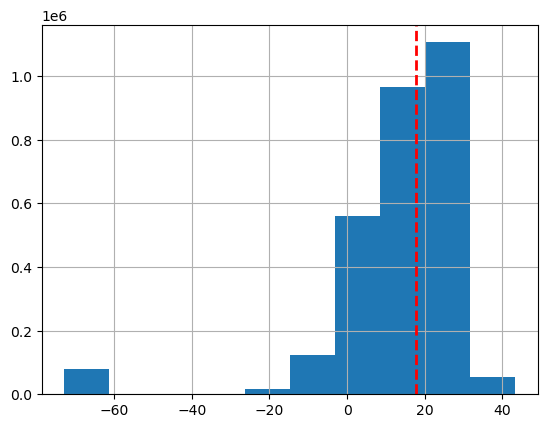

In [6]:
df['AvgTemperature'].hist()

plt.axvline(df['AvgTemperature'].std(), color='red', linestyle='dashed', linewidth=2)

####  Supprimez les valeurs aberrantes et retracer l'histogramme

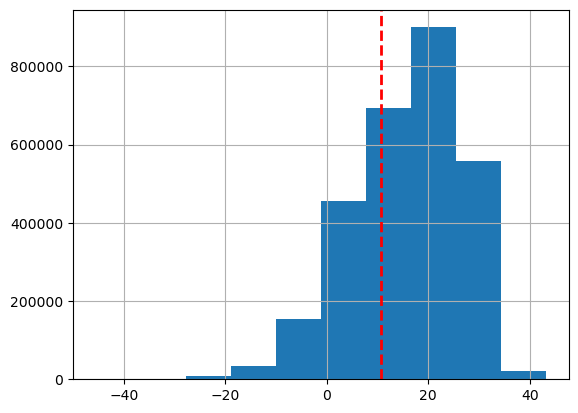

In [7]:
df = df[df['AvgTemperature'] > -60]

df["AvgTemperature"].hist()

plt.axvline(df['AvgTemperature'].std(), color='red', linestyle='dashed', linewidth=2)

#### Triez les valeurs par colonne Année, Mois et Jour 


In [8]:
df = df.sort_values(['Year', 'Month', 'Day']).reset_index(drop = True)

####  Nous n’avons pas complètement les données de 2020, alors supprimons-les simplement de notre ensemble de données - Réaffichez le résultat

In [9]:
df.drop(df[df['Year'] == 2020].index, axis = 0, inplace = True)

df.tail()

,Region,Country,City,Month,Day,Year,AvgTemperature
2787908,North America,US,Green Bay,12,31,2019,-2.4
2787909,North America,US,Madison,12,31,2019,-3.7
2787910,North America,US,Milwaukee,12,31,2019,-2.2
2787911,North America,US,Casper,12,31,2019,-7.6
2787912,North America,US,Cheyenne,12,31,2019,-4.2


## Tâche 3 : Température mondiale de 1995 à 2019 
    - Agrégation de nos données en fonction de l’année 
    - tracer nos données dans un graphique linéaire 

**Créer un tableau présentant les valeurs moyennes de la température par année (de 1995 jusqu'à 2019) Appellez ce tableau 'data_agg' et affichez un aperçu**

In [10]:
data_agg = df.groupby(['Year'])['AvgTemperature'].mean().round(1).reset_index()

data_agg

,Year,AvgTemperature
0,1995,15.2
1,1996,14.8
2,1997,15.1
3,1998,16.0
4,1999,15.7
5,2000,15.4
6,2001,15.7
7,2002,15.7
8,2003,15.6
9,2004,15.6


#### Dessinons un graphique linéaire pour ces données. N'oubliez pas la légende et le titre du graphee.

Text(0, 0.5, 'Température (°C)')

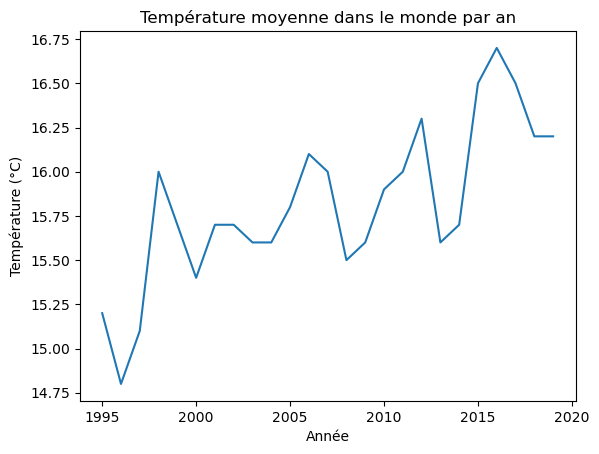

In [11]:
plt.plot(data_agg['Year'], data_agg['AvgTemperature'])

plt.title('Température moyenne dans le monde par an')
plt.xlabel('Année')
plt.ylabel('Température (°C)')

Faites une mise à jour du graphe pour affichez les valeurs moyennes de **Toutes les années** Sur le graphe. (Utilisez .update_xaxes )

`MathPlotLib`

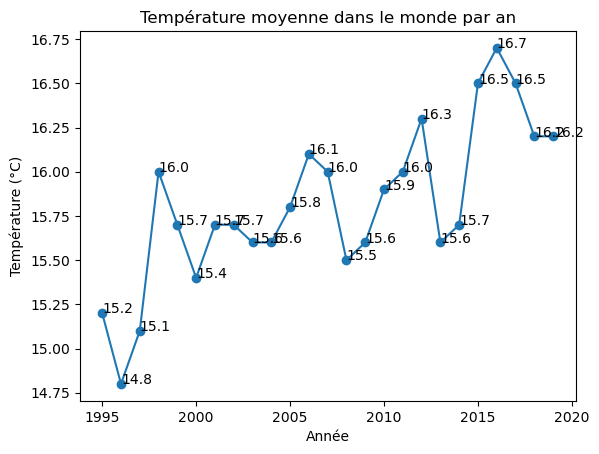

In [12]:
plt.plot(data_agg['Year'], data_agg['AvgTemperature'], marker='o')

plt.title('Température moyenne dans le monde par an')
plt.xlabel('Année')
plt.ylabel('Température (°C)')

for i, temp in enumerate(data_agg['AvgTemperature']):
    plt.text(data_agg['Year'][i], temp, str(round(temp, 2)))

plt.show()

`Plotly`

In [13]:
fig = px.line(data_agg, x='Year', y='AvgTemperature')
fig.update_xaxes(tickmode = 'linear')
fig.show()

### Analyse globale des tendances
Ajoutez à la précédente figure une ligne linéaire (qu'on nommera 'tendance') à l’aide de numpy et de **la régression linéaire**

`MathPlotLib`

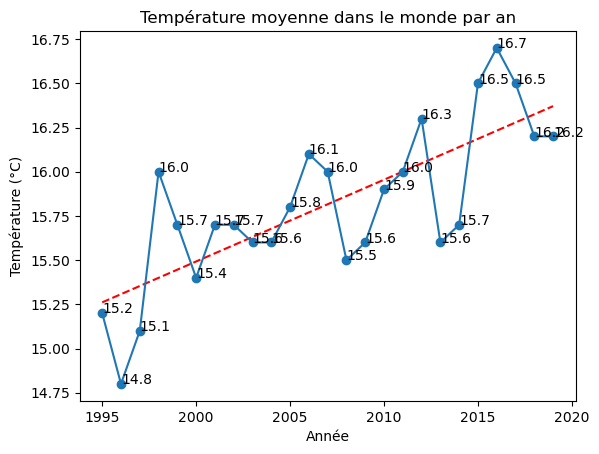

In [14]:
#y = mx + c

m, b = np.polyfit(data_agg['Year'], data_agg['AvgTemperature'], 1)
trendline = m * data_agg['Year'] + b

plt.plot(data_agg['Year'], trendline, color='red', linestyle='--')
plt.plot(data_agg['Year'], data_agg['AvgTemperature'], marker='o')

plt.title('Température moyenne dans le monde par an')
plt.xlabel('Année')
plt.ylabel('Température (°C)')

for i, temp in enumerate(data_agg['AvgTemperature']):
    plt.text(data_agg['Year'][i], temp, str(round(temp, 2)))

plt.show()

`Plotly 1ère méthode`

In [15]:
fig = px.scatter(data_agg, x='Year', y='AvgTemperature', trendline = 'ols')
fig.update_xaxes(tickmode = 'linear')
fig.update_traces(mode = 'lines')
fig.show()

`Plotly 2ème méthode`

In [16]:
year = data_agg["Year"].tolist()
avgTemp = data_agg["AvgTemperature"].tolist()

fit = np.polyfit(year, avgTemp, 1)
fonction = np.poly1d(fit)
y_fit = fonction(year) 

fig = px.line(data_agg, x = "Year", y = "AvgTemperature")
fig.update_xaxes(tickmode = 'linear')

fig.add_traces(go.Scatter(x = year, y = y_fit, name = 'Tendance'))

### Graphique à barres vs Graphique en courbes
Comparons le graphique à barres et le graphique en courbes en termes de tâches que nous pouvons résoudre en utilisant chacun d’eux

Traçons un graphique à barres pour les mêmes données - Visualisez les années par des couleurs 

`MathPlotLib`

In [17]:
def hex_to_RGB(hex_str):
    """ #FFFFFF -> [255,255,255]"""
    #Pass 16 to the integer function for change of base
    return [int(hex_str[i:i+2], 16) for i in range(1,6,2)]

def get_color_gradient(c1, c2, n):
    """
    Given two hex colors, returns a color gradient
    with n colors.
    """
    assert n > 1
    c1_rgb = np.array(hex_to_RGB(c1))/255
    c2_rgb = np.array(hex_to_RGB(c2))/255
    mix_pcts = [x/(n-1) for x in range(n)]
    rgb_colors = [((1-mix)*c1_rgb + (mix*c2_rgb)) for mix in mix_pcts]
    return ["#" + "".join([format(int(round(val*255)), "02x") for val in item]) for item in rgb_colors]

Text(0, 0.5, 'Température (°C)')

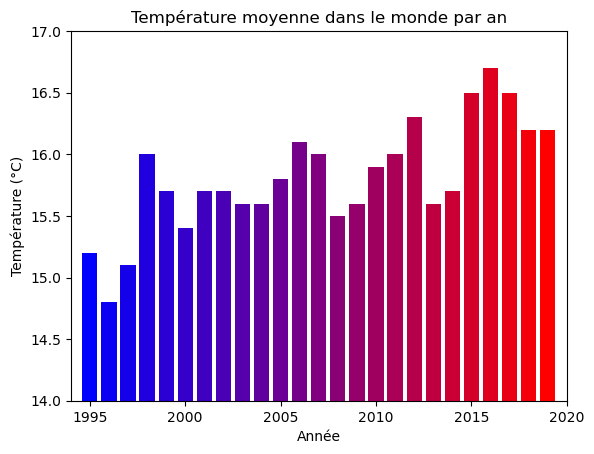

In [18]:
plt.bar(data_agg['Year'], data_agg['AvgTemperature'], color = get_color_gradient('#0000ff', '#ff0000', len(data_agg)))

plt.axis([1994, 2020, 14, 17])

plt.title('Température moyenne dans le monde par an')
plt.xlabel('Année')
plt.ylabel('Température (°C)')

`Plotly`

In [19]:
fig = px.bar(data_agg, x = "Year", y = "AvgTemperature", title = "Température moyenne dans le monde par an", color = "Year")
fig.update_xaxes(tickmode = 'linear')

fig.show()

Retraçez le graphique à barres pour les mêmes données - Visualisez cette fois-ci les températures moyennes par des couleurs 

`MathPlotLib`

In [20]:
def gradientbars(bars, ydata, cmap):

    ax = bars[0].axes
    lim = ax.get_xlim() + ax.get_ylim()
    ax.axis(lim)

    for bar in bars:
        bar.set_facecolor("none")

        x,y = bar.get_xy()
        w, h = bar.get_width(), bar.get_height()

        grad = np.atleast_2d(np.linspace(0,9 * h / max(ydata), 256)).T
        ax.imshow(grad, extent = [x,x+w,y,y+h], origin = 'lower', aspect = "auto", norm = cm.colors.NoNorm(vmin = 0, vmax = 1), cmap = plt.get_cmap(cmap))


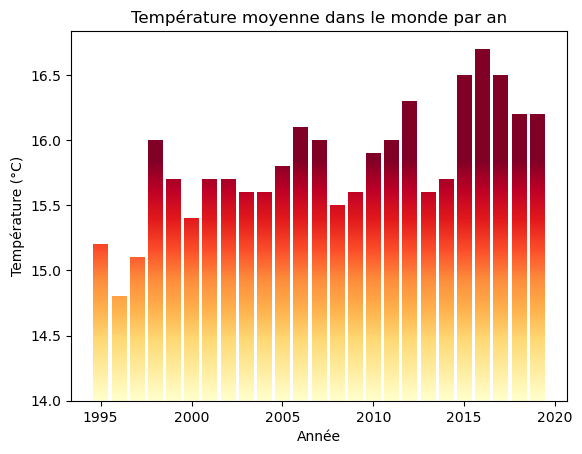

In [21]:
fig, ax = plt.subplots()

my_bar = ax.bar(data_agg['Year'], (data_agg['AvgTemperature'] - 14), bottom = 14)

gradientbars(my_bar, data_agg['AvgTemperature'], "YlOrRd")

plt.title('Température moyenne dans le monde par an')
plt.xlabel('Année')
plt.ylabel('Température (°C)')

plt.show()

`Plotly`

In [22]:
fig = px.bar(data_agg, x = "Year", y = "AvgTemperature", title = "Température moyenne dans le monde par an", color = "AvgTemperature")
fig.update_xaxes(tickmode = 'linear')

fig.show()

**Interpretez le résultat**

`La température mondiale a, en moyenne, augmenté ces 25 dernières années`

________

### Tâche 4: Comparons la température moyenne annuelle de différentes régions au fil du temps

**Calculez la valeur moyenne annuelle des températures et groupez les par region et par année -**  **Affichez un aperçu** 

In [23]:
data_agg = df.groupby(['Year', 'Region'])['AvgTemperature'].mean().round(1).reset_index()

data_agg.head()

,Year,Region,AvgTemperature
0,1995,Africa,23.3
1,1995,Asia,19.6
2,1995,Australia/South Pacific,16.2
3,1995,Europe,10.9
4,1995,Middle East,22.0


**Dessinons un graphique linéaire pour ces données - On veut afficher toutes les années sur l'axe des abcisses et visualiser les régions par couleurs**

`MathPlotLib`

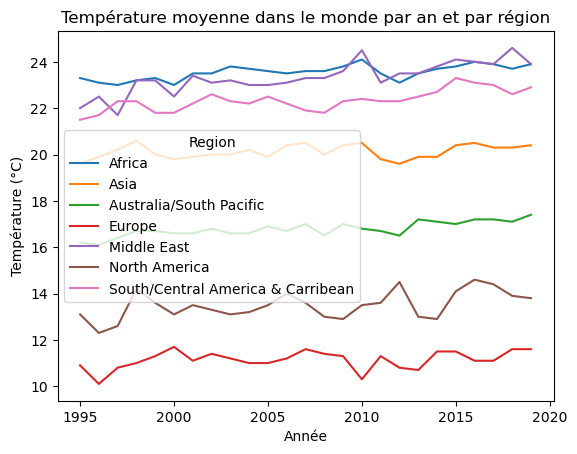

In [24]:
data_agg.pivot(index='Year', columns='Region', values='AvgTemperature').plot.line()

plt.title('Température moyenne dans le monde par an et par région')
plt.xlabel('Année')
plt.ylabel('Température (°C)')

plt.show()

`Plotly`

In [25]:
fig = px.line(data_agg, x = "Year", y = "AvgTemperature", title = "Température moyenne dans le monde par an et par région", color = "Region")
fig.update_xaxes(tickmode = 'linear')
fig.show()

**Comment peut-on visualiser que la courbe de l'Europe sans saisir des lignes de codes ?**

`Il suffit de désélectionner toutes les lignes à droite du graphique, sauf 'europe'`

_____________

### Tâche 5 : Température moyenne mensuelle au Canada

**La première étape consiste à extraire les données du Canada (Nous nous intéressons qu'à l'année, le mois et la température)**

In [26]:
df_canada = df[df['Country'] == 'Canada'].reset_index(drop = True)

df_canada.drop(['Region', 'Country', 'City', 'Day'], inplace = True, axis = 1)

df_canada

,Month,Year,AvgTemperature
0,1,1995,-10.8
1,1,1995,-12.5
2,1,1995,-2.8
3,1,1995,-6.7
4,1,1995,-6.3
...,...,...,...
73693,12,2019,-13.6
73694,12,2019,-5.4
73695,12,2019,-13.3
73696,12,2019,-3.6


**Calculer la température moyenne mensuelle au canada pour les années de 1995 à 2019**

In [27]:
df_canada = df_canada.groupby(['Month', 'Year'])['AvgTemperature'].mean().round(1).reset_index().sort_values(['Year', 'Month']).reset_index(drop = True)

df_canada

,Month,Year,AvgTemperature
0,1,1995,-7.0
1,2,1995,-7.9
2,3,1995,-1.2
3,4,1995,3.5
4,5,1995,11.7
...,...,...,...
295,8,2019,17.5
296,9,2019,12.7
297,10,2019,4.2
298,11,2019,-3.6


Création d’une colonne de date avec ce format ***MOIS/ANNÉE*** (Faites attention aux types de données dans la colonne)

In [28]:
df_canada['Date'] = df_canada[['Month', 'Year']].apply(lambda x: '/'.join(x.values.astype(str)), axis = 1)
df_canada

,Month,Year,AvgTemperature,Date
0,1,1995,-7.0,1/1995
1,2,1995,-7.9,2/1995
2,3,1995,-1.2,3/1995
3,4,1995,3.5,4/1995
4,5,1995,11.7,5/1995
...,...,...,...,...
295,8,2019,17.5,8/2019
296,9,2019,12.7,9/2019
297,10,2019,4.2,10/2019
298,11,2019,-3.6,11/2019


Traçons un graphique à barres pour analyser ces données - Affichez les mois par couleurs

`MathPlotLib`

Text(0, 0.5, 'Température (°C)')

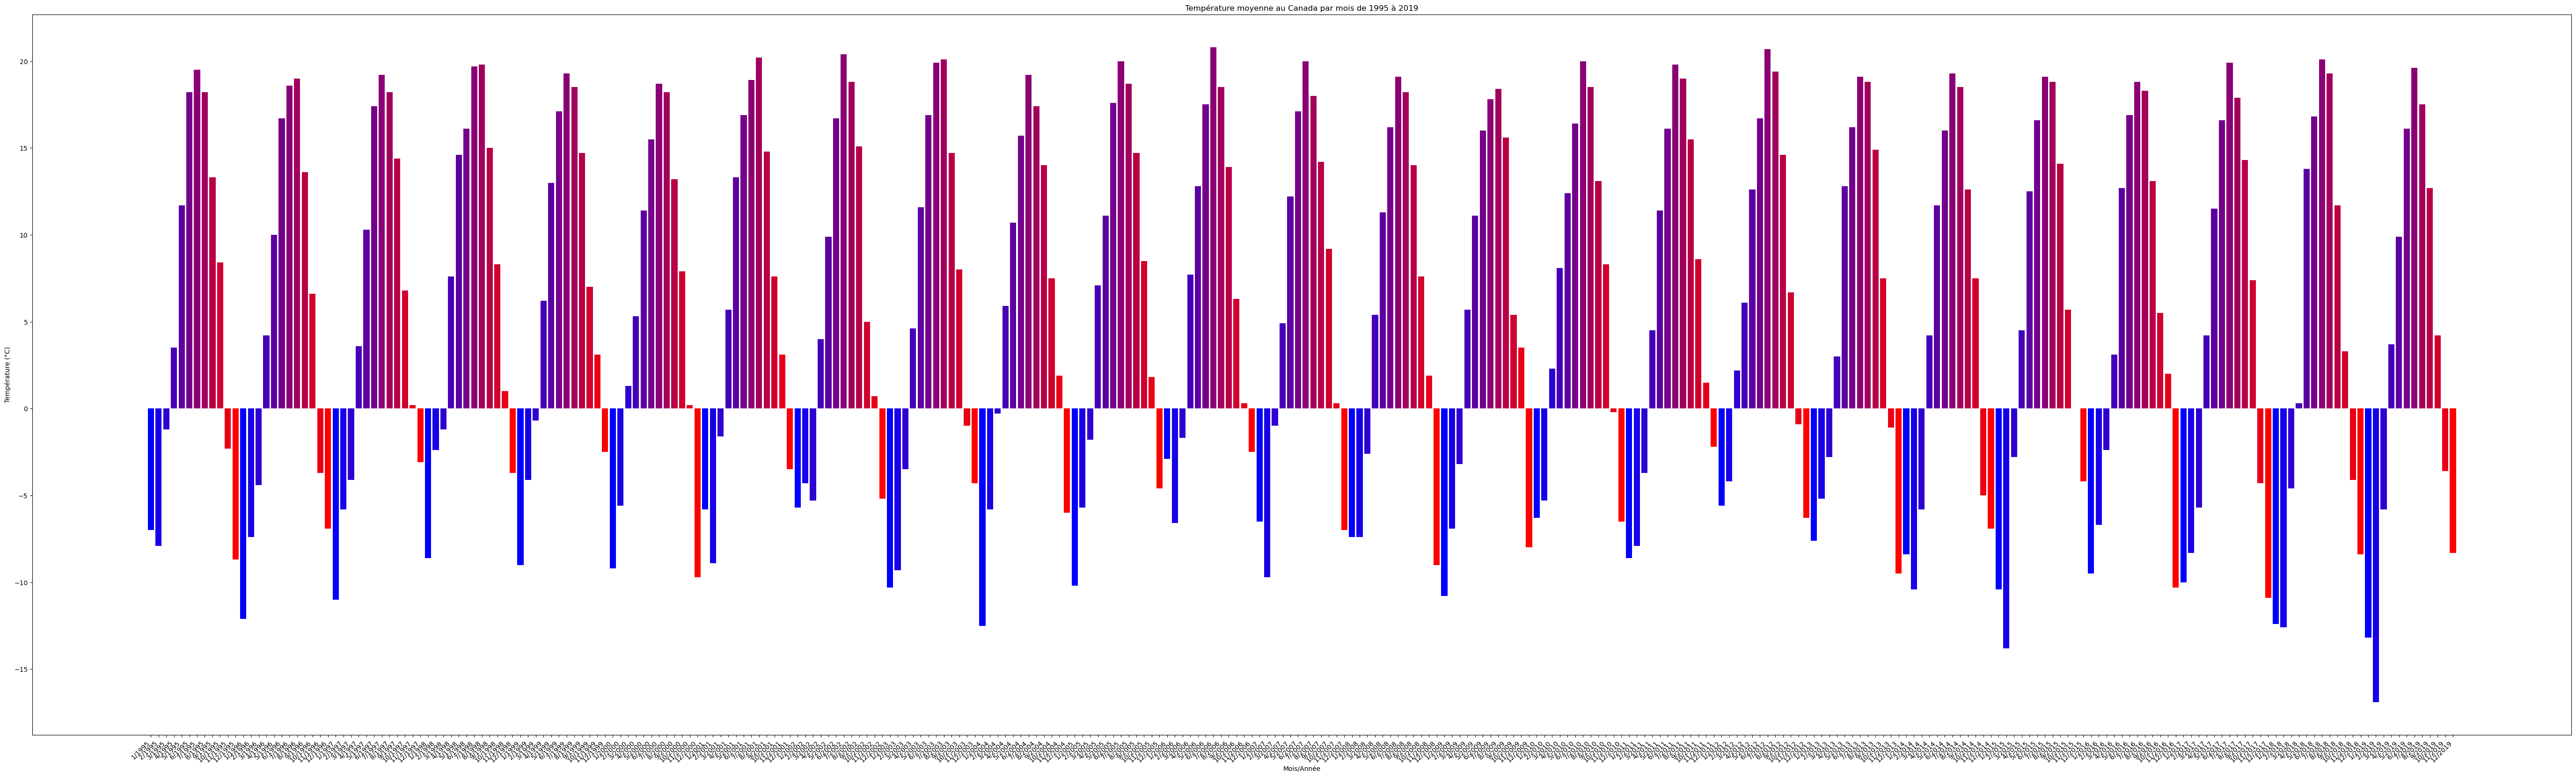

In [29]:
plt.figure(figsize = (70, 20))

plt.bar(df_canada['Date'], df_canada['AvgTemperature'], color = get_color_gradient('#0000ff', '#ff0000', 12))

plt.xticks(rotation = 45, ha = 'right')

plt.title('Température moyenne au Canada par mois de 1995 à 2019')
plt.xlabel('Mois/Année')
plt.ylabel('Température (°C)')

`Plotly`

In [30]:
fig = px.bar(df_canada, x = "Date", y = "AvgTemperature", title = 'Température moyenne au Canada par mois de 1995 à 2019', color = "Month")
fig.show()

### Utilisons un Box Plot pour analyser les mêmes données

**Qu'est ce qu'un Box Plot?**

`Un Box Plot est une méthode pour démontrer graphiquement les groupes de localité, d'étalement et d'asymétrie de données numériques par leurs quartiles.`

________________

Utiliser un box plot pour analyser les même données (données de temp moyenne mensuelle au Canada): **Déterminer les valeurs maximale, minimale et la médiane directement du graphe, pour le mois de janvier**

`MathPlotLib`

Text(0, 0.5, 'Température (°C)')

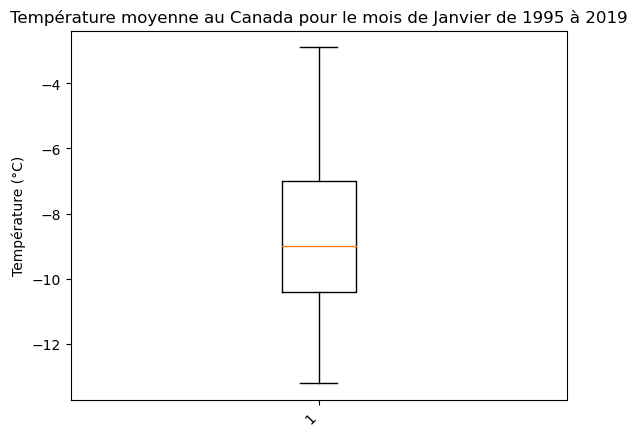

In [31]:
# plt.figure(figsize = (70, 20))

plt.boxplot(df_canada[df_canada['Date'].str[:2] == '1/']['AvgTemperature'])

plt.xticks(rotation=45, ha='right')

plt.title('Température moyenne au Canada pour le mois de Janvier de 1995 à 2019')
plt.ylabel('Température (°C)')

```
Température moyenne en Janvier:

- Min = -13
- Max = -3
- Median = -9
```

`Plotly`

In [32]:
fig = px.box(df_canada, x = "Month", y = "AvgTemperature")
fig.update_xaxes(tickmode = 'linear')
fig.show()

```
Température moyenne en Janvier:

- Min = -13.2
- Max = -2.9
- Median = -9
```

### Tâche 6: Ecrivez une fonction permettant d'analyser la température moyenne de n'importe quel pays en entrée. 

In [33]:
def temp_analysis(df, country):

    df = df[df['Country'] == country].reset_index(drop = True)
    data_agg = df.groupby(['Year'])['AvgTemperature'].mean().round(1).reset_index()

    # Courbe Tendance
    fig = px.scatter(data_agg, x = 'Year', y = 'AvgTemperature', trendline = 'ols', title = f"Températures moyennes annuelles de 1995 à 2019 pour {country}")
    fig.update_xaxes(tickmode = 'linear')
    fig.update_traces(mode = 'lines')
    fig.show()

    # BarPlot annuel
    fig = px.bar(data_agg, x = "Year", y = "AvgTemperature", title = f"Température moyenne par an de 1995 à 2019 pour {country}", color = "AvgTemperature")
    fig.update_xaxes(tickmode = 'linear')
    fig.show()

    # BarPlot mensuel
    data_agg = df.groupby(['Month', 'Year'])['AvgTemperature'].mean().round(1).reset_index().sort_values(['Year', 'Month']).reset_index(drop = True)
    data_agg['Date'] = data_agg[['Month', 'Year']].apply(lambda x: '/'.join(x.values.astype(str)), axis = 1)
    fig = px.bar(data_agg, x = "Date", y = "AvgTemperature", title = f'Température moyenne par mois chaque année de 1995 à 2019 pour {country}', color = "Month")
    fig.show()

    # Box plot
    fig = px.box(data_agg, x = "Month", y = "AvgTemperature", title = f"Température moyenne par mois pour {country}", color = "Month")
    fig.update_xaxes(tickmode = 'linear')
    fig.show()

    # Résumé
    print(f"La température moyenne pour {country} de 1995 à 2019 est de {round(data_agg['AvgTemperature'].mean(), 1)}°C")

---

## Taiwan

In [34]:
temp_analysis(df, 'Taiwan')

La température moyenne pour Taiwan de 1995 à 2019 est de 23.3°C


---

## France

In [35]:
temp_analysis(df, 'France')

La température moyenne pour France de 1995 à 2019 est de 13.0°C


---

## Afrique du Sud

In [36]:
temp_analysis(df, 'South Africa')

La température moyenne pour South Africa de 1995 à 2019 est de 16.9°C
